In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [3]:
#데이터 불러오기
df3=pd.read_csv('공공자전거 대여이력 정보_22.03.csv', encoding='cp949')
df4=pd.read_csv('공공자전거 대여이력 정보_22.04.csv', encoding='cp949')
df5=pd.read_csv('공공자전거 대여이력 정보_22.05.csv', encoding='cp949')
df6=pd.read_csv('공공자전거 대여이력 정보_22.06.csv', encoding='cp949')

In [4]:
#데이터 확인
df3.head(1),df4.head(1),df5.head(1),df6.head(1)

(       자전거번호                 대여일시  대여 대여소번호 대여 대여소명  대여거치대  \
 0  SPB-48288  2022-03-01 11:07:08         3    중랑센터      0   
 
                   반납일시  반납대여소번호           반납대여소명  반납거치대  이용시간    이용거리  
 0  2022-03-01 11:17:14      540  군자역 7번출구 베스트샵 앞      0    10  2510.0  ,
        자전거번호                 대여일시  대여 대여소번호 대여 대여소명  대여거치대  \
 0  SPB-51307  2022-04-02 11:36:43         3    중랑센터      0   
 
                   반납일시  반납대여소번호             반납대여소명  반납거치대  이용시간    이용거리  
 0  2022-04-02 11:46:51      625  답십리초등학교 앞(현대시장 옆)      0    10  1650.0  ,
        자전거번호                 대여일시  대여 대여소번호       대여 대여소명  대여거치대  \
 0  SPB-53010  2022-05-01 12:26:32       529  장한평역 8번 출구 앞      0   
 
                   반납일시  반납대여소번호 반납대여소명  반납거치대  이용시간     이용거리  
 0  2022-05-01 12:32:32        3   중랑센터      0     6  1758.79  ,
        자전거번호                 대여일시  대여 대여소번호       대여 대여소명  대여거치대  \
 0  SPB-59614  2022-06-01 06:36:04       668  서울축산농협(장안지점)      0   
 
                   반납일시  반납대여소번호 반납대여

In [5]:
#데이터 결합
df=pd.concat([df3, df4, df5, df6])
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-48288,2022-03-01 11:07:08,3,중랑센터,0,2022-03-01 11:17:14,540,군자역 7번출구 베스트샵 앞,0,10,2510.00
1,SPB-54559,2022-03-01 16:03:23,3,중랑센터,0,2022-03-01 16:27:18,1447,면목역 3번출구,0,23,4920.00
2,SPB-49324,2022-03-11 22:04:38,3,중랑센터,0,2022-03-11 22:26:24,4819,면목동 새싹어린이공원 앞,0,21,4240.00
3,SPB-50216,2022-03-13 16:03:04,3,중랑센터,0,2022-03-13 16:15:17,540,군자역 7번출구 베스트샵 앞,0,12,2908.58
4,SPB-30276,2022-03-17 16:21:19,3,중랑센터,0,2022-03-17 16:31:20,540,군자역 7번출구 베스트샵 앞,0,10,2259.01


In [6]:
#데이터 정보 파악
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15516351 entries, 0 to 4196984
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   int64  
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      int64  
 10  이용거리      float64
dtypes: float64(1), int64(5), object(5)
memory usage: 1.4+ GB


In [7]:
#결측치 확인
df.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

In [8]:
#날짜를 시계열 데이터로 변환
df['대여일시']=pd.to_datetime(df['대여일시'])
df['반납일시']=pd.to_datetime(df['반납일시'])

In [9]:
df.dtypes

자전거번호               object
대여일시        datetime64[ns]
대여 대여소번호             int64
대여 대여소명             object
대여거치대                int64
반납일시        datetime64[ns]
반납대여소번호              int64
반납대여소명              object
반납거치대                int64
이용시간                 int64
이용거리               float64
dtype: object

In [10]:
#필요 없는 컬럼 삭제
df.drop(columns=['반납거치대','대여거치대','자전거번호'], inplace=True)
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2022-03-01 11:07:08,3,중랑센터,2022-03-01 11:17:14,540,군자역 7번출구 베스트샵 앞,10,2510.00
1,2022-03-01 16:03:23,3,중랑센터,2022-03-01 16:27:18,1447,면목역 3번출구,23,4920.00
2,2022-03-11 22:04:38,3,중랑센터,2022-03-11 22:26:24,4819,면목동 새싹어린이공원 앞,21,4240.00
3,2022-03-13 16:03:04,3,중랑센터,2022-03-13 16:15:17,540,군자역 7번출구 베스트샵 앞,12,2908.58
4,2022-03-17 16:21:19,3,중랑센터,2022-03-17 16:31:20,540,군자역 7번출구 베스트샵 앞,10,2259.01


In [11]:
#컬럼 이름 변경
df.rename(columns={'대여 대여소명':'대여장소'}, inplace=True)
df.rename(columns={'반납대여소명':'반납장소'},inplace=True)
df.head(1)

,대여일시,대여 대여소번호,대여장소,반납일시,반납대여소번호,반납장소,이용시간,이용거리
0,2022-03-01 11:07:08,3,중랑센터,2022-03-01 11:17:14,540,군자역 7번출구 베스트샵 앞,10,2510.0


In [12]:
#대여&반납 일자와 시간 컬럼 생성
df['대여날짜']=df['대여일시'].dt.date
df['반납날짜']=df['반납일시'].dt.date
df['대여시간']=df['대여일시'].dt.hour
df['반납시간']=df['반납일시'].dt.hour
df.head(1)

,대여일시,대여 대여소번호,대여장소,반납일시,반납대여소번호,반납장소,이용시간,이용거리,대여날짜,반납날짜,대여시간,반납시간
0,2022-03-01 11:07:08,3,중랑센터,2022-03-01 11:17:14,540,군자역 7번출구 베스트샵 앞,10,2510.0,2022-03-01,2022-03-01,11,11


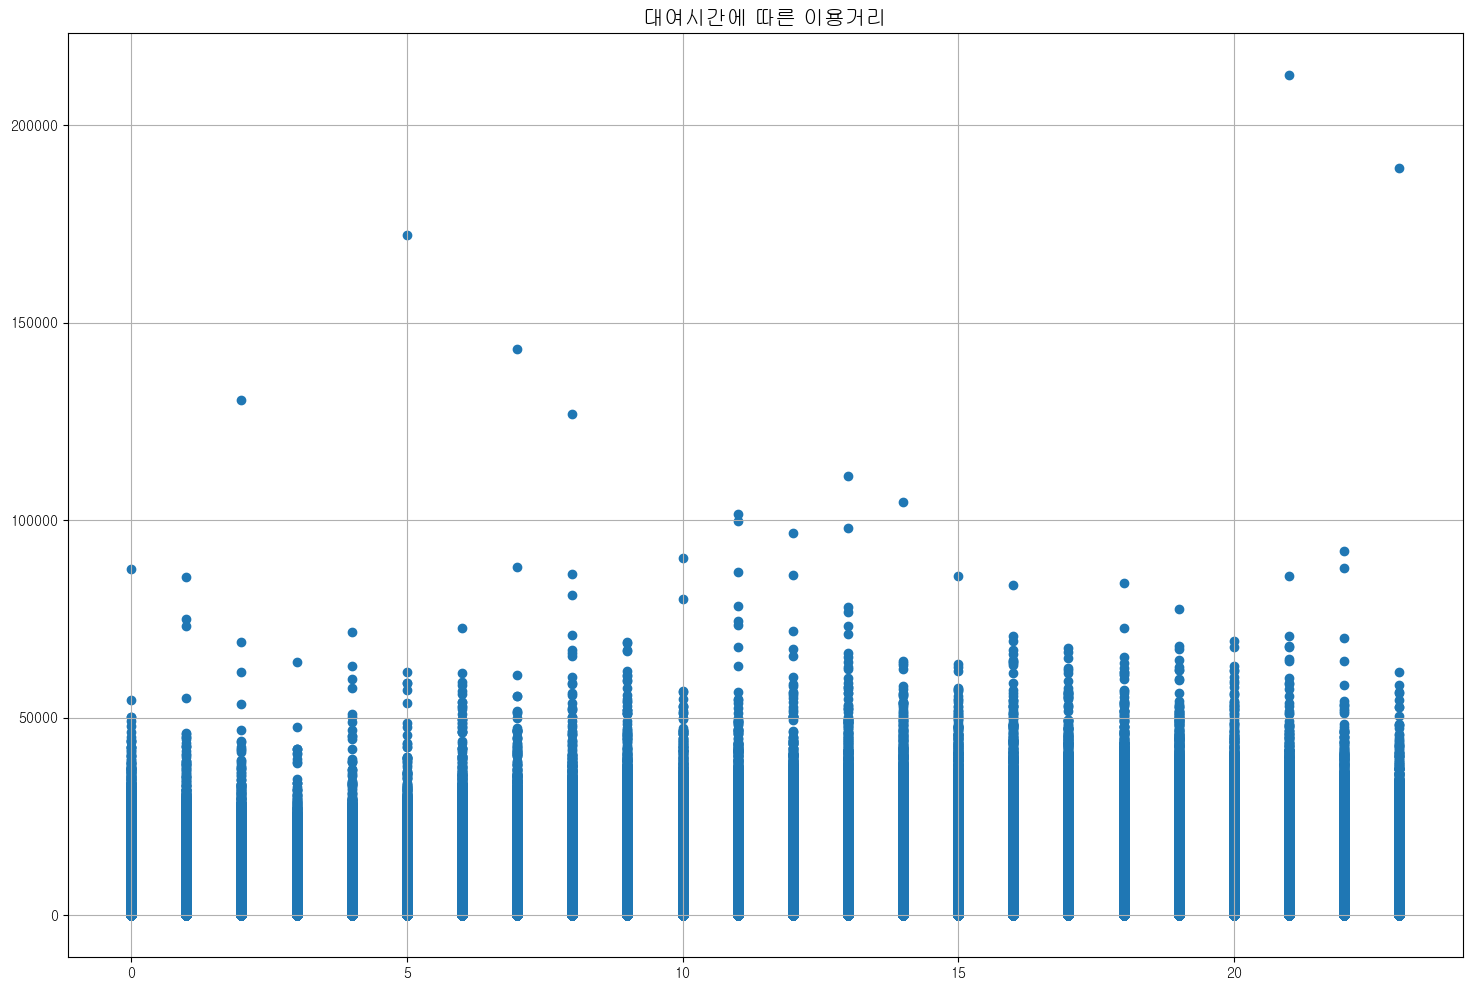

In [13]:
#대여시간에 따른 이용거리 시각화
x=df['대여시간']
y=df['이용거리']
plt.figure(figsize=(18,12))
plt.scatter(x,y)
plt.grid()
plt.title('대여시간에 따른 이용거리', fontsize=15)
plt.show()

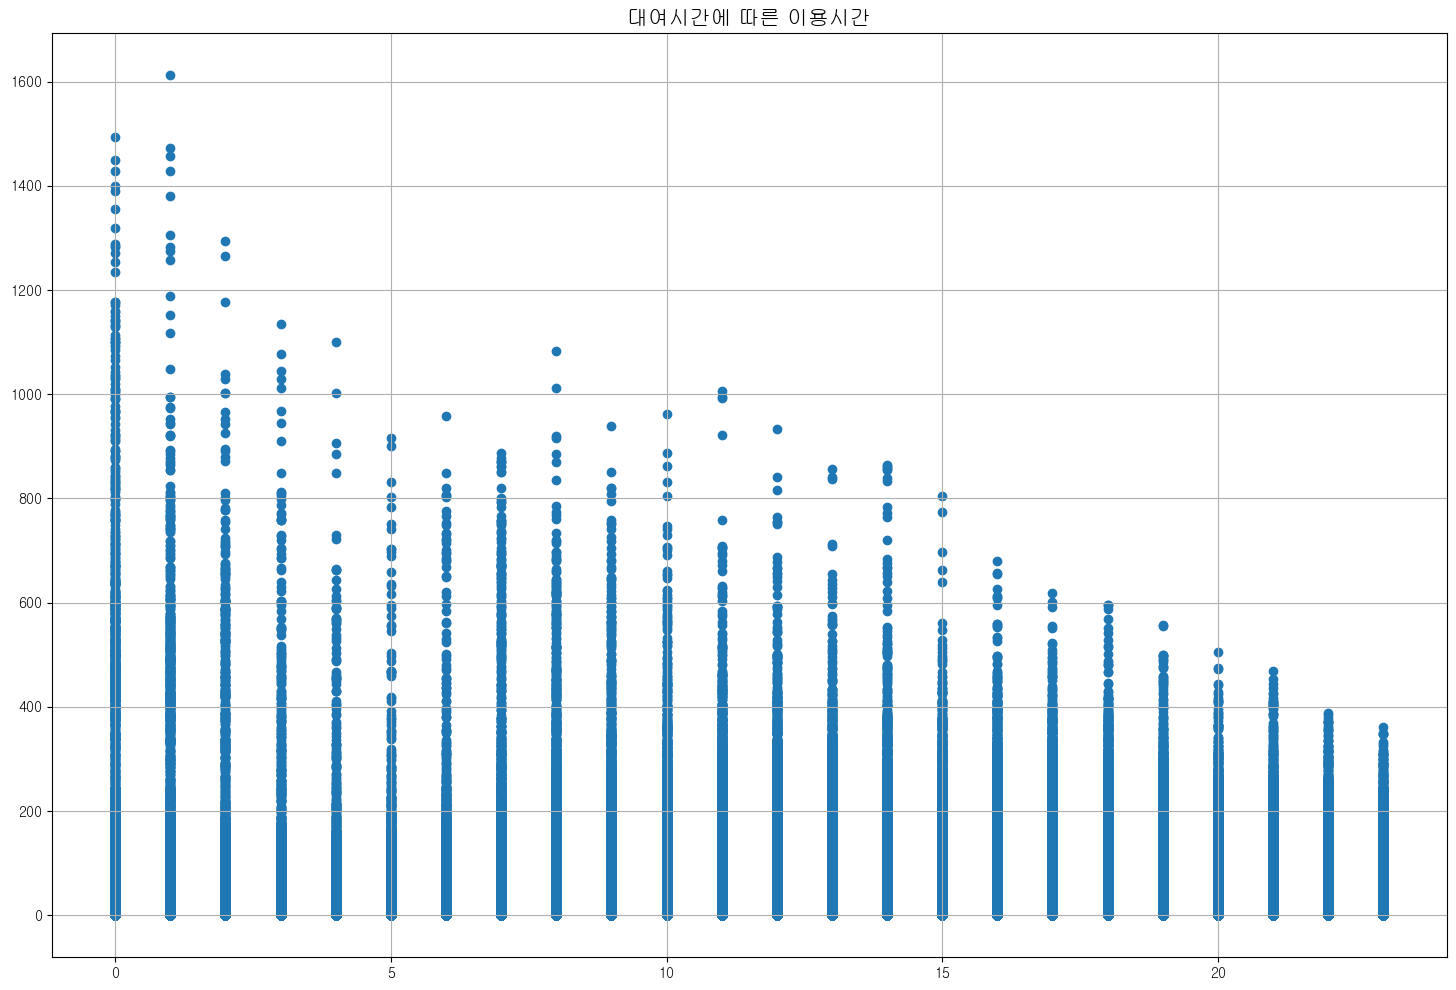

In [14]:
#대여시간에 따른 이용시간 시각화
x=df['대여시간']
y=df['이용시간']
plt.figure(figsize=(18,12))
plt.scatter(x,y)
plt.grid()
plt.title('대여시간에 따른 이용시간', fontsize=15)
plt.show()

In [15]:
#대여 장소에 따른 대여 건수
df['대여장소'].value_counts().to_frame()

,대여장소
여의나루역 1번출구 앞,64046
뚝섬유원지역 1번출구 앞,63496
한강공원 망원나들목,61095
마곡나루역 2번 출구,55158
봉림교 교통섬,45385
...,...
테스트 대여소,5
개화정비,3
위트콤,3
위트콤공장,3


In [16]:
#반납 장소에 따른 대여 건수
df['반납장소'].value_counts().to_frame()

,반납장소
뚝섬유원지역 1번출구 앞,73895
한강공원 망원나들목,69003
여의나루역 1번출구 앞,61095
마곡나루역 2번 출구,55172
봉림교 교통섬,46443
...,...
위트콤공장,4
테스트 대여소,3
위트콤,2
상암단말정비,2


In [17]:
#이용 시간 통계 값
df['이용시간'].describe().round(2)

count    15516351.00
mean           23.85
std            27.26
min             0.00
25%             7.00
50%            14.00
75%            31.00
max          1612.00
Name: 이용시간, dtype: float64

In [18]:
#이용 거리 통계값
df['이용거리'].describe().round(2)

count    15516351.00
mean         2830.16
std          3401.52
min             0.00
25%           900.00
50%          1676.25
75%          3343.65
max        212632.90
Name: 이용거리, dtype: float64

In [19]:
#대여장소 종류
df['대여장소'].unique()

array(['중랑센터', '상암센터 정비실', '위트콤', ..., '은평 성모병원 사거리',
       '르네상스호텔사거리 역삼지하보도 2번출구', '3645 구역삼세무서 교차로'], dtype=object)

In [22]:
df_Sinchon=df[df['대여장소'].str.contains('신촌')]
df_Sinchon.head()

,대여일시,대여 대여소번호,대여장소,반납일시,반납대여소번호,반납장소,이용시간,이용거리,대여날짜,반납날짜,대여시간,반납시간
33861,2022-03-01 00:32:37,128,신촌역(2호선) 1번출구 옆,2022-03-01 00:39:45,3119,연희 브라운스톤 아파트 앞,7,0.0,2022-03-01,2022-03-01,0,0
33862,2022-03-01 01:10:43,128,신촌역(2호선) 1번출구 옆,2022-03-01 01:12:52,3011,경의선(노고산동),2,0.0,2022-03-01,2022-03-01,1,1
33863,2022-03-01 00:42:51,128,신촌역(2호선) 1번출구 옆,2022-03-01 01:29:59,771,목동아파트 703동 앞,47,9060.0,2022-03-01,2022-03-01,0,1
33864,2022-03-01 08:20:14,128,신촌역(2호선) 1번출구 옆,2022-03-01 08:23:56,4248,4251 공덕역 경의선숲길 커뮤니티센터,3,0.0,2022-03-01,2022-03-01,8,8
33865,2022-03-01 13:16:55,128,신촌역(2호선) 1번출구 옆,2022-03-01 13:29:21,114,홍대입구역 8번출구 앞,12,1170.0,2022-03-01,2022-03-01,13,13


In [23]:
df_Sinchon.tail()

,대여일시,대여 대여소번호,대여장소,반납일시,반납대여소번호,반납장소,이용시간,이용거리,대여날짜,반납날짜,대여시간,반납시간
4068886,2022-06-22 19:37:29,129,신촌역(2호선) 6번출구 옆,2022-06-22 19:55:07,4801,충정로역 2호선(엘리베이터 앞),17,2466.55,2022-06-22,2022-06-22,19,19
4087883,2022-06-21 22:12:21,4220,신촌 청년주택,2022-06-22 00:04:07,4825,신내동 벽산아파트 후문 앞,111,46880.00,2022-06-21,2022-06-22,22,0
4160634,2022-06-15 19:34:30,129,신촌역(2호선) 6번출구 옆,2022-06-15 20:25:30,5053,신마곡벽산블루밍메트로오피스텔앞,51,16273.33,2022-06-15,2022-06-15,19,20
4190807,2022-06-17 20:21:15,4220,신촌 청년주택,2022-06-17 21:19:24,5075,등촌역 1번출구,58,8170.00,2022-06-17,2022-06-17,20,21
4195544,2022-06-04 00:20:34,128,신촌역(2호선) 1번출구 옆,2022-06-04 01:36:09,5851,도림천 건널목 위,75,18450.41,2022-06-04,2022-06-04,0,1


In [35]:
# 신촌 내에서 대여와 반납 장소
df_on=df_Sinchon.groupby('대여장소')['대여 대여소번호'].count().to_frame()
df_on.sort_values(by='대여 대여소번호', ascending=False)

,대여 대여소번호
대여장소,
신촌역(2호선) 7번출구 앞,10494
신촌 청년주택,9070
신촌역(2호선) 1번출구 옆,7898
신촌역(2호선) 6번출구 옆,4227
신촌동 제1공영주차장 앞,4213
신촌역 4번출구,4100
e편한세상 신촌4단지 앞,3887
신촌기차역입구 교차로,2717
4248 신촌 교보빌딩,1782


In [34]:
df_off=df_Sinchon.groupby('반납장소')['대여 대여소번호'].count().to_frame()
df_off.sort_values(by='대여 대여소번호', ascending=False)

,대여 대여소번호
반납장소,
신촌 청년주택,2955
신촌역(2호선) 7번출구 앞,1846
경의선(노고산동),1444
신촌역(2호선) 1번출구 옆,1270
홍대입구역 8번출구 앞,1151
...,...
서울사대부속초교 앞,1
서울디지털운동장 앞,1
서울도시가스 앞,1
